In [1]:
import sys
sys.path.append("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv")
import torch
import numpy as np
from resnet_model import new_ResNet18
from prepare_data import distributed_cifar10_dataloaders
from training import train_PullSum
from network_func import *
from useful_functions import *

In [2]:
n = 5
batch_size = 256

CIFAR10_root = (
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/cifar-10-python/cifar-10-batches-py"
)

trainloader_list, testloader = distributed_cifar10_dataloaders(
    n, batch_size=batch_size, root=CIFAR10_root
)

In [3]:
I = np.eye(n)
one = np.ones(n)
R = np.outer(one, one) / n
A, B = R, R
show_row(A)
_, __ = test_row(A)
print(f"{_:.4e}, {__:.4e}")

A的第二大特征值: 4.790584196710678e-25
A的beta: 1.387778780781446e-16
A的spectral gap: 0.9999999999999999
A的kappa: 1.0000000000000002
S_A是: 4.472135954999581 

1.0000e+00, 5.0000e+00


optimizer初始化成功!


Training Progress: 100%|██████████| 100/100 [59:05<00:00, 35.46s/it, epoch=100, test_accuracy=90.0700000000%, test_loss=0.2930548342, train_loss=0.3912478027]


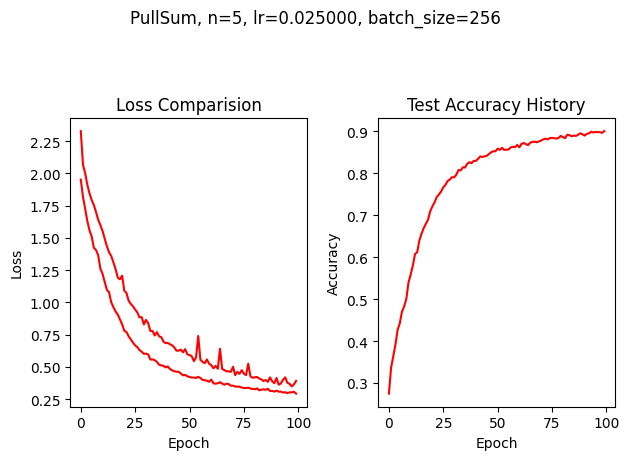

([2.327542316913605,
  2.067586979269982,
  2.002040113806724,
  1.9128594189882278,
  1.8456400030851365,
  1.793616280555725,
  1.754488452076912,
  1.7005180543661116,
  1.640809150338173,
  1.5989641243219377,
  1.5544203966856,
  1.4937838804721832,
  1.4354565012454983,
  1.38780467569828,
  1.3592901331186293,
  1.3102391403913498,
  1.258220431804657,
  1.192262492477894,
  1.178669048845768,
  1.20689747184515,
  1.090294374227524,
  1.0733806788921356,
  1.0125492799282076,
  0.9881427603960036,
  0.9697129550576207,
  0.9447292682528499,
  0.9220579582452773,
  0.8840040481090548,
  0.8858357539772989,
  0.8291812582314015,
  0.8641796207427979,
  0.8381441330909727,
  0.7778111028671264,
  0.7783400073647503,
  0.7437877589464188,
  0.7688719594478606,
  0.7372081512212755,
  0.7310824435949325,
  0.6964000572264195,
  0.6842727586627005,
  0.6859750294685364,
  0.6757774797081948,
  0.6670774933695791,
  0.651150884926319,
  0.6260512620210646,
  0.6260400132834911,
  0.63

In [4]:
lr = 5e-3
epochs = 100

train_PullSum(
    n=5,
    A=A,
    B=B,
    model_class=new_ResNet18,
    seed_for_model=42,
    epochs=epochs,
    lr=lr,
    trainloader_list=trainloader_list,
    testloader=testloader,
    show_graph=True,
    batch_size=batch_size,
    csv_root=f'/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/output/Resnet18, lr={lr}, batch_size={batch_size}.csv'
)